## Demo for learning single channel PSF from SMLM data given the stage tilt

##### Setup environment

In [64]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf

try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [65]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='1ch',sysfile='TIRF')

##### Edit user defined parameters

In [66]:

L.param.datapath = r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4/'
L.param.filelist = [r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4\Data4-2023-10-7-17-36-53.h5']
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.option.model.symmetric_mag = False
L.param.option.model.const_pupilmag = True
L.param.option.insitu.repeat = 3
L.param.roi.peak_height = 0.4
L.param.option.model.bin=1
L.param.option.model.n_max = 6

**Step 3**. use the following settings to relearn the PSF model with index mismatch.   
set `stage_tilt` to the value estimated from `demo_insituPSF_1ch_estimate_tilt.ipynb`

*Note:* when relearn the PSF model, run the notebook from the beginning, or click `Restart` and run from the beginning.

In [67]:
L.param.savename = L.param.datapath+'psf_kmed'
L.param.loss_weight.Inorm = 0.02 # weight for the minimizing the stage position
L.param.loss_weight.psf_min = 2
L.param.option.insitu.stage_tilt = [0.9585427238514055, -0.7673322789419936] # tilt in [y,x], unit: nm/pixel 
L.param.option.imaging.RI.med = 1.335
L.param.option.insitu.var_stagepos = True

##### Start learning

In [68]:
images = []
for i in range(0,1):
    L.param.option.insitu.dataId = i
    img = L.load_data()
    images.append(img)

(1900, 256, 256)


In [85]:
images = np.concatenate(images,axis=0)

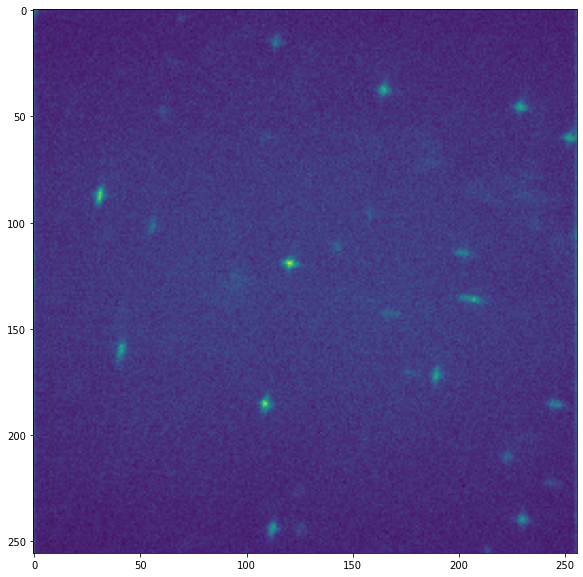

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])

In [6]:
images = np.concatenate(images,axis=0)

In [7]:
#images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

rois shape channel : (24461, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.10s/it total time: 1.05s
5/6: localization: 2/2 [00:00s]  8.00it/s total time: 1.30s
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\Anaconda3\envs\psfinv\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
3/6: learning: 336/? [01:23s]  4.03it/s, current loss: 0.57294, total time: 83.45s   


outlier percentage: 0.2352702153596099
rois shape channel : (1882, 21, 21)


3/6: learning: 176/250 [00:39s]  4.42it/s, current loss: 0.52019, total time: 123.24s  
4/6: calculating spline coefficients: 1/1 [00:01s]  1.02s/it total time: 1.01s
5/6: localization: 2/2 [00:00s] 18.70it/s total time: 1.11s
6/6: saving results: [00:02s] total time: 3.70s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.03s/it total time: 1.00s
5/6: localization: 2/2 [00:00s]  3.36it/s total time: 1.60s
3/6: learning: 137/250 [00:55s]  2.47it/s, current loss: 0.52024, total time: 55.52s


outlier percentage: 0.2386895475819033
rois shape channel : (3416, 21, 21)


3/6: learning: 109/250 [00:39s]  2.77it/s, current loss: 0.50561, total time: 94.80s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.01s/it total time: 1.01s
5/6: localization: 2/2 [00:00s] 22.58it/s total time: 1.09s
6/6: saving results: [00:03s] total time: 4.19s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.04s/it total time: 1.01s
5/6: localization: 2/2 [00:00s]  4.50it/s total time: 1.46s
3/6: learning: 346/? [02:17s]  2.52it/s, current loss: 0.51382, total time: 137.34s  


outlier percentage: 0.23721787194841082
rois shape channel : (3312, 21, 21)


3/6: learning: 92/250 [00:32s]  2.87it/s, current loss: 0.50004, total time: 169.35s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.02s/it total time: 1.01s
5/6: localization: 2/2 [00:00s] 18.52it/s total time: 1.12s
6/6: saving results: [00:03s] total time: 4.17s


##### Show results

In [4]:
resfile = r'Y:\Projects\Super Critical Angle Localization Microscopy\Data\10-06-2023\Data4\psf_kmed2_insitu_zernike_single.h5'

In [5]:
f,p = io.h5.load(resfile) # load result file

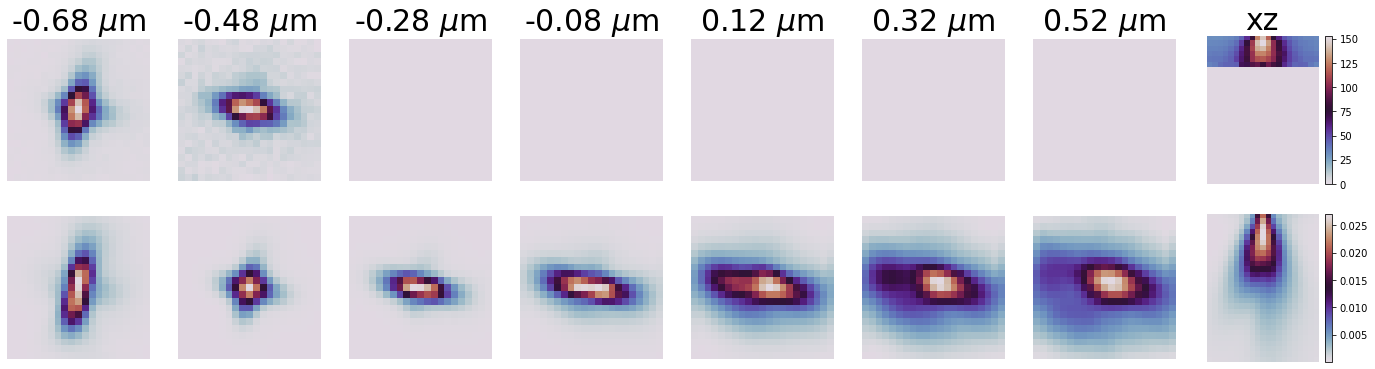

In [6]:
showpsfvsdata_insitu(f,p)

##### Optional plots

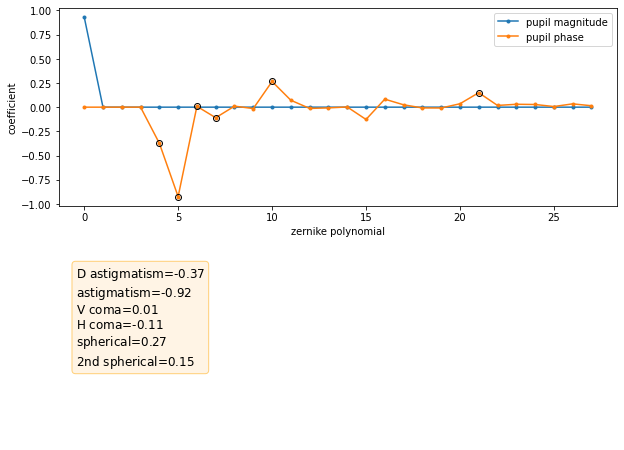

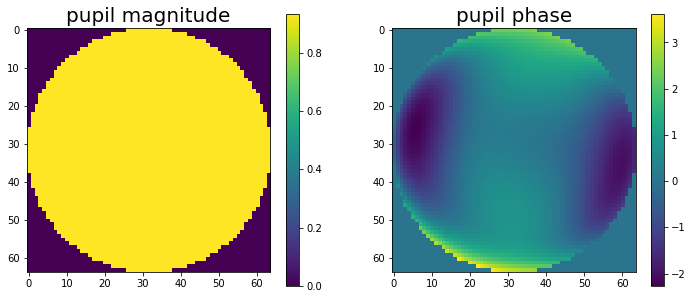

In [20]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

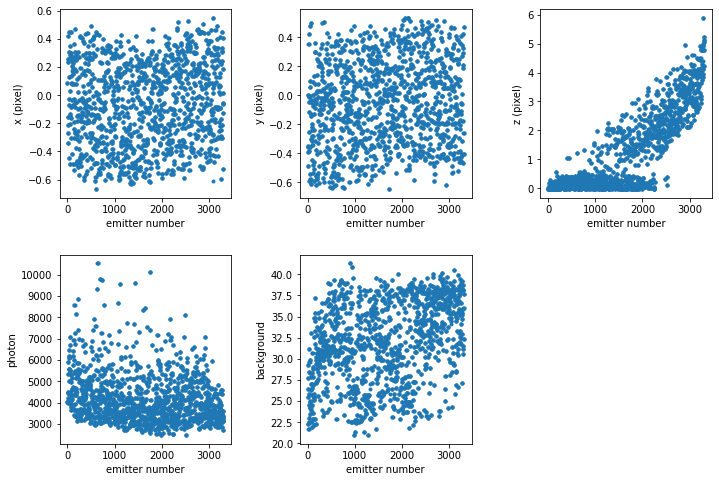

In [7]:
showlearnedparam_insitu(f,p)

(array([ 15.,  12.,  21.,  36.,  69.,  66., 120., 126., 136.,  99., 136.,
        120., 131., 112., 123., 119.,  99.,  99., 120.,  68.,  93., 116.,
         59.,  81.,  87.,  51.,  67.,  50.,  69.,  37.,  47.,  68.,  57.,
         44.,  39.,  48.,  19.,  45.,  33.,  30.,  21.,  24.,  30.,  12.,
         18.,  21.,  15.,   3.,   9.,  12.,  15.,  15.,  15.,   9.,   9.,
         12.,   3.,   9.,   6.,   9.,   6.,   9.,   0.,   6.,   3.,   3.,
          0.,   6.,   0.,   0.,   6.,   0.,   0.,   3.,   3.,   6.,   0.,
          3.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   3.,
          3.,   0.,   6.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,
          3.]),
 array([ 2473.9753,  2554.533 ,  2635.0906,  2715.6482,  2796.2058,
         2876.7634,  2957.321 ,  3037.8787,  3118.436 ,  3198.9937,
         3279.5513,  3360.109 ,  3440.6665,  3521.224 ,  3601.7817,
         3682.3394,  3762.897 ,  3843.4546,  3924.0122,  4004.5698,
         4085.1274,  4165.685 ,  4246.2427,  4

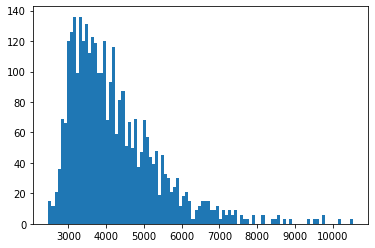

In [105]:
plt.hist(f.res.intensity,bins=100)

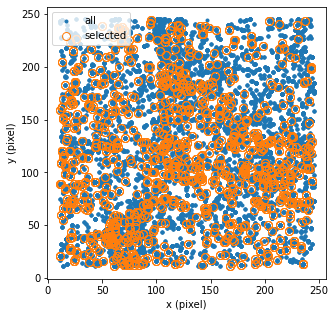

In [23]:
showcoord(f,p)

**Step 4:** check residue stage tilt

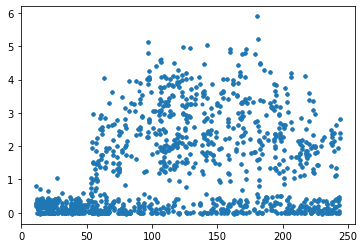

In [10]:
plt.plot(f.res.cor[:,-1],f.res.pos[:,0],'.')

In [24]:
resfile

'Y:\\Projects\\Super Critical Angle Localization Microscopy\\Data\\10-06-2023\\Data4/psf_kmed2_insitu_zernike_single.h5'

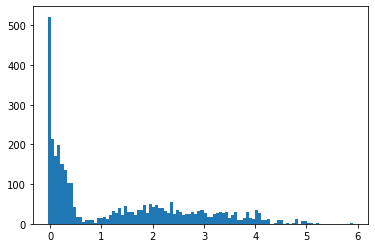

In [11]:

plt.hist(f.res.pos[:,0],bins=100)
plt.show()

adjust lower and upper limit in `mask` to select emitters at the coverslip

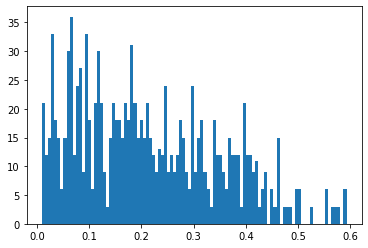

In [14]:
mask = (f.res.pos[:,0]<0.6) & (f.res.pos[:,0]>0.01)
plt.hist(f.res.pos[mask,0],bins=100)
plt.show()

In [15]:
np.sum(mask)

1183

In [8]:
 f.res.stagepos

array([0.16042449], dtype=float32)

In [17]:
stpos = f.res.stagepos + f.res.cor[:,-1]*f.res.stagetilt[-1] + f.res.cor[:,-2]*f.res.stagetilt[-2]

In [18]:
np.min(stpos)

-0.007437541673425585

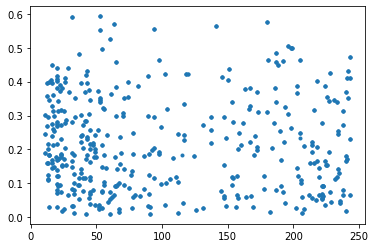

In [19]:
plt.plot(f.res.cor[mask,-1],f.res.pos[mask,0],'.')

estimate residue stage tilt from the selected emitters

In [20]:
X = np.vstack([f.res.cor[mask,-2],f.res.cor[mask,-1],np.ones(np.sum(mask))])
Y = f.res.pos[mask,0]*p.pixel_size.z*1e3
beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.transpose())),X),Y.transpose())

In [21]:
residue_total_tilt = beta[0:2]*f.rois.image_size[-1] # residual stage tilt across FOV, unit: nm
print('residual total tilt: ',residue_total_tilt)

residual total tilt:  [ 1.710164   -0.51550203]


**Step 5:** if residue stage tilt is greater than 5 nm, copy the `stagetilt` value to `L.param.option.insitu.stage_tilt` at *Step 3*, and repeat *Steps 3-4*.

In [22]:
stagetilt = p.option.insitu.stage_tilt-beta[0:2] # corrected stage tilt, unit: nm/pixel
print('updated stage tilt: ',list(stagetilt))

updated stage tilt:  [0.9518623957357925, -0.7653185991490683]


**Step 6:** Generate FD psf model for deepfit training

In [97]:
total_tilt = f.res.stagetilt*f.rois.image_size[-1] #total stage tilt across the FOV, unit: um
print('total stage tilt: ',total_tilt.flatten())

total stage tilt:  [ 0.24538694 -0.19643706]


In [99]:
Ndiv = 1 # number of divisions in x and y dimensions across the FOV
xrange = np.linspace(0,f.rois.image_size[-1],Ndiv+1,dtype=np.float32)
yrange = np.linspace(0,f.rois.image_size[-2],Ndiv+1,dtype=np.float32)
[xx,yy] = np.meshgrid(xrange,yrange)
cor = np.vstack((yy.flatten(),xx.flatten())).transpose()
stpos = f.res.stagepos + cor[:,-1]*f.res.stagetilt[-1] + cor[:,-2]*f.res.stagetilt[-2]

In [100]:
cor

array([[  0.,   0.],
       [  0., 256.],
       [256.,   0.],
       [256., 256.]], dtype=float32)

In [101]:
stpos

array([[ 0.16042449, -0.03601258,  0.40581143,  0.20937437]],
      dtype=float32)

In [91]:
f.res.stagepos

array([0.16042449], dtype=float32)

In [98]:
f.res.stagetilt*100

array([[[ 0.09585427]],

       [[-0.07673322]]], dtype=float32)

In [28]:
strange = np.arange(0,np.max(stpos)+0.02,0.01)
pz = 0.002 # unit: um
L.param = p
L.param.pixel_size.z = pz
Nz = 101
zpos  = np.linspace(0,Nz-1,Nz,dtype=np.complex64).reshape((Nz,1,1))
I_model = []
for stposi in strange:    
    f,_ = L.genpsf(f,Nz=Nz,xsz=21,stagepos=stposi,zpos = zpos)
    I_model.append(f.res.I_model)
I_model = np.stack(I_model)

display the FD psf model

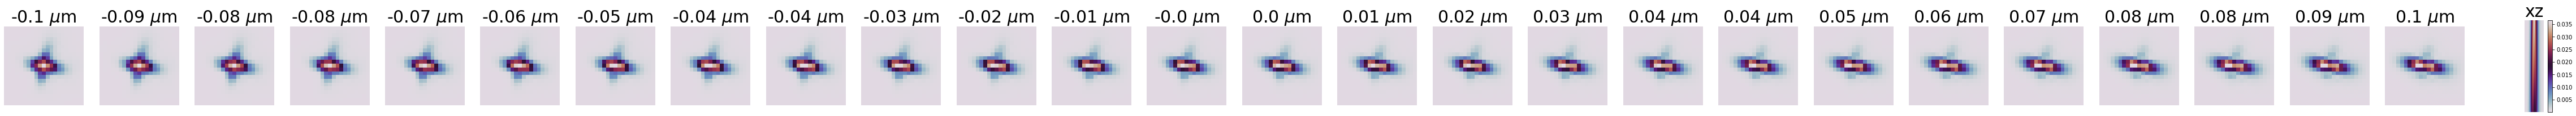

In [103]:
f.res.I_model = I_model[0] # first two indices are the global locations of the PSF, unit: division index
showpsf(f,p)

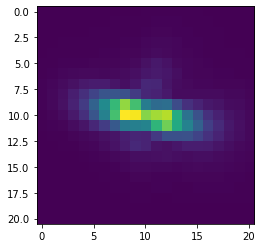

In [63]:
plt.imshow(I_model[0,-1])

In [52]:
img = np.zeros((5,5))

In [53]:
img[1,3]=1

In [54]:
img

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

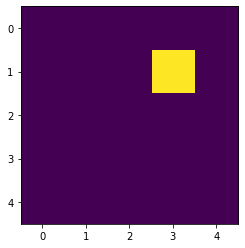

In [55]:
plt.imshow(img)

save the FD psf model

In [37]:
f.res.I_model = I_model
filename = resfile[:-3]+'_4D_tilt.h5'
L.writeh5file(filename,f.res,f.locres,f.rois)

**Step 7:** Open `load.jl` in `MicroscopePSF` package (branch: test_IMMpsf), use lines 49-54 to convert above .h5 to .jld2 file.     
**Step 8:** Open `test_train.jl` in `SMLMDeepFit.jl`, use the above generated .jld2 file to for training.   
- set `minz` and `maxz` based on the z range in the spline PSF model.
- set `bgmaxz` equal to `abs(minz)`.
- set `photons` and `minphotons` based on the SMAP localization results.
- set `bg` to be around 1.4 times the median background in the SMAP localization results.   

**Step 9:** Open `inference_visualize_celldata_SEQ_FD.ipynb` in `SMLMDeepFit.jl`, use the trained model for localizations.   
**Step 10:** Use Matlab script `smld2smap.m` to convert .h5 from deepfit to .mat file for visualization in SMAP. 
